In [2]:
import sys
sys.path.append("../src/")
sys.path.append("..")
from utils_v1 import load_optical_image
from utils_v1 import load_tiff_image
from src import rasterTools
import os
from icecream import ic
import numpy as np
import matplotlib.pyplot as plt
import cv2


path = "D:/Jorge/datasets/sentinel2/MS/2019"
filename = "Mosaico_SENTINEL_22473_Agosto2019_10m_8bits_EPG32722_crop.tif"


In [3]:

im = load_tiff_image(os.path.join(path, filename))
im = np.transpose(im, (1, 2, 0))
ic(im.shape)


D:/Jorge/datasets/sentinel2/MS/2019\Mosaico_SENTINEL_22473_Agosto2019_10m_8bits_EPG32722_crop.tif


ic| im.shape: (18605, 19481, 4)


(18605, 19481, 4)

In [20]:
im.shape

(18605, 19481, 4)

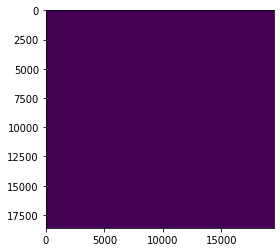

In [22]:
plt.imshow(im[...,[3]])

In [24]:
np.min(im[...,[3]])

255

In [16]:

print("im.shape", im.shape)
condition = np.sum(im[..., [2,1,0]], axis=-1)
condition_ = np.zeros_like(condition)

condition_[condition > 0] = 1


im.shape (18605, 19481, 4)


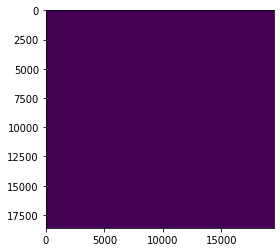

In [15]:
plt.imshow(condition_)

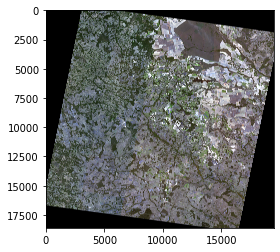

In [5]:
plt.imshow(im[...,[2,1,0]])

In [14]:
filename = "S2_MS_B4_B3_2019_crop.tif"
im1 = load_tiff_image(os.path.join(path, filename))
im1 = np.transpose(im1, (1, 2, 0))
filename = "S2_MS_B2_B8_2019_crop.tif"
im2 = load_tiff_image(os.path.join(path, filename))
im2 = np.transpose(im2, (1, 2, 0))


D:/Jorge/datasets/sentinel2/MS/2019\S2_MS_B4_B3_2019_crop.tif
D:/Jorge/datasets/sentinel2/MS/2019\S2_MS_B2_B8_2019_crop.tif


In [22]:
im2.dtype

dtype('float32')

In [23]:
im.dtype

dtype('uint8')

In [25]:
# im3 = np.concatenate((im1, im2), axis=-1)

im3 = np.load(os.path.join(path, "optical_im_l1c.npy"))

In [26]:
im3.shape

(18605, 19481, 4)

In [27]:
im3[...,[2,1,0]].shape
np.max(im3[...,[2,1,0]])

1.0

In [28]:
np.max(im[...,[2,1,0]])

255

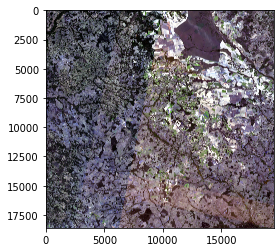

In [29]:
plt.imshow(im3[...,[2,1,0]]/np.max(im3[...,[2,1,0]]))